# Wie laufen lassen?

1. Gehe zu https://mybinder.org/
2. Trage als Repo-URL ein: https://github.com/tilothiele/corona-rohdatenanalyse.git
3. Trage als Branch ein: main
4. Trage als Notebook-File ein: /rki-fallzahlen-diagramme.ipynb
5. mit Launch starten

Es dauert 1-2 Minuten, bis die Notebook-Umgebung betriebsbereit ist. Anschließend die einzelnen Abschnitte mit dem Run-Button starten.


In [1]:
from tqdm import tqdm
import requests

def download_file(url, filename):
    response = requests.get(url, stream=True)

    with open(filename, "wb") as handle:
        for data in tqdm(response.iter_content()):
            handle.write(data)

from datetime import datetime
import os

now = datetime.now()

data_dir = "data-"+now.strftime("%Y%m%d")

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/COVID-19_Todesfaelle.html
# Tabellen mit der Zahl der COVID-19-Todesfälle nach Sterbedatum pro Woche und pro Monat, 
# nach Bundesländern, Geschlecht und Altersgruppen.
# Die Anzahl der verstorbenen COVID-19-Fälle werden nach einer Sicherheitsfrist von knapp 3 Wochen veröffentlicht, 
# um die relative Vollständigkeit der Daten zu gewährleisten. Dennoch ist für die letzten dargestellten Wochen noch mit Nachmeldungen zu rechnen. Die Zahl der verstorbenen COVID-19-Fälle ist noch nicht für Meldeverzug korrigiert.
todesfaelle_file = os.path.join(data_dir, "rki-todesfaelle.xlsx")

# https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html
# 7-Tage-Inzidenzen nach Bundesländern und Kreisen (fixierte Werte) sowie 7-Tage-Inzidenz der hospitalisierten COVID-19-Fälle nach Bundesländern (fixierte Werte), Stand: 2.12.2021
# Hinweis: Diese Exceldatei wird seit dem 25.11.2021 wöchentlich jeden Donnerstag aktualisiert statt wie bisher arbeitstäglich.
# Die Exceldatei enthält folgende Daten:
#    aktuelle 7-Tage-Fallzahlen und -Inzidenzen nach Bundesländern und Kreisen
#    Archiv der 7-Tage-Fallzahlen und -Inzidenzen nach Bundesländern (seit Mai 2020), Kreisen (seit November 2020) und die 7-Tage-Inzidenz der hospitalisierten COVID-19 Fälle nach Bundesland (September 2021)
#    hospitalisierte COVID-19-Fälle/100.000 Einwohner in den vergangenen 7 Tagen, wie sie am jeweiligen Tag berechnet wurden, für Gesamtdeutschland und nach Bundesland (seit September 2021)
# Bei den 7-Tage-Fallzahlen und -Inzidenzen für frühere Tage muss berücksichtigt werden, dass es sich um die jeweils an dem angegebenen Tag berichteten Werte handelt, die nicht durch an 
# Folgetagen nachübermittelte Fälle aktualisiert werden (für den Berichtstag "eingefrorene/fixierte" Werte).
fallzahlen_file = os.path.join(data_dir, "rki-fallzahlen.xlsx")

# https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.html;jsessionid=EBF483D5C06A029F864C2FF57097ACC0.internet072?nn=13490888
# Tabelle mit den gemeldeten Impfungen nach Bundesländern und Impfquoten nach Altersgruppen (3.12.2021, Tabelle wird montags bis freitags aktualisiert)
# Die Erhebung der Daten zur COVID-19-Impfung erfolgte zunächst in Impfzentren, Krankenhäusern und durch die Mobilen Impfteams. 
# Inzwischen sind Betriebsmediziner und Betriebsmedizinische Dienste hinzugekommen. Autorisiertes Personal aus den genannten Einrichtungen kann über die Webanwendung 
# "Digitales Impfquotenmonitoring" die Daten eingeben und über eine gesicherte Internetverbindung täglich an die Bundesdruckerei übermitteln, wo im Auftrag des RKI die Daten zwischengespeichert und vom RKI täglich abgerufen werden.
# Es fließen außerdem die aggregierten Impfdaten der niedergelassenen Ärzte ein, die täglich an die KBV übermittelt werden, und die aggregierten Daten der Privatärzte, die täglich an eine eigene Plattform übermittelt werden. 
# Von beiden Portalen werden die Daten ebenfalls täglich vom RKI abgerufen.
# Tabelle und Abbildungen werden von Montag bis Freitag bis mittags aktualisiert und geben in der Regel jeweils den Datenstand bis 08:00 Uhr des Tages der Publikation wieder. Die publizierten Daten können aufgrund des 
# Übermittlungsverzugs auch Nachmeldungen und Korrekturen aus den Vortagen enthalten.
impfquoten_file = os.path.join(data_dir, "rki-impfquotenmonitoring.xlsx")

# https://www.intensivregister.de/#/aktuelle-lage/downloads
# Siehe auch https://www.intensivregister.de/#/aktuelle-lage/zeitreihen
divi_zeitreihen_file = os.path.join(data_dir, "divi-zeitreihe-gesamt.csv")

# https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.html;jsessionid=9B5F7B1D3D90BC64537B9321A0E5CFB8.live741
sterbefaelle_zeitreihen_file = os.path.join(data_dir, "destatis-sterbefaelle.xlsx")

# Inzidenzen der symptomatischen und hospitalisierten COVID-19-Fälle nach Impfstatus (Tabelle jeden Donnerstag aktualisiert)
# Zur Darstellung des Effekts der Impfung auf die COVID-19-Krankheitslast in der Bevölkerung wurde die Inzidenz 
# sowohl der symptomatischen als auch der hospitalisierten COVID-19-Fälle unter vollständig Geimpften und Ungeimpften 
# ab Kalenderwoche 28 getrennt berechnet. 
# Eine ausführliche Beschreibung und Interpretation der Daten sowie deren Limitationen wird im Wochenbericht des RKI veröffentlicht.
# https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.html;jsessionid=9B5F7B1D3D90BC64537B9321A0E5CFB8.live741
hospitalisierung_zeitreihen_file = os.path.join(data_dir, "rki-hospitalisierung-impfstatus.xlsx")

# https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/VOC_VOI_Tabelle.xlsx?__blob=publicationFile
# B.1.1.7 (Alpha) - %-Spalte C
# B.1.351 (Beta) - %-Spalte E
# P.1 (Gamma) - %-Spalte I
# B.1.617.2 (Delta) - %-Spalte G
# B.1.1.529 (Omikron) - %-Spalte L
voc_zeitreihen_file = os.path.join(data_dir, "rki-variants-of-concern.xlsx")




# Download
download_file("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/COVID-19_Todesfaelle.xlsx?__blob=publicationFile", todesfaelle_file)
download_file("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Gesamtuebersicht.xlsx?__blob=publicationFile", fallzahlen_file)
download_file("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.xlsx?__blob=publicationFile", impfquoten_file)
download_file("https://diviexchange.blob.core.windows.net/%24web/zeitreihe-deutschland.csv", divi_zeitreihen_file)
download_file("https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.xlsx?__blob=publicationFile", sterbefaelle_zeitreihen_file)
download_file("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Inzidenz_Impfstatus.xlsx?__blob=publicationFile", hospitalisierung_zeitreihen_file)    
download_file("https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/VOC_VOI_Tabelle.xlsx?__blob=publicationFile", voc_zeitreihen_file)    

    

51560it [00:00, 214951.41it/s]
55133it [00:00, 204911.22it/s]
86563it [00:00, 222492.25it/s]
154916it [00:00, 238669.40it/s]
1067090it [00:04, 246144.89it/s]
37897it [00:00, 202082.13it/s]
124827it [00:00, 228941.78it/s]


In [2]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import math
from datetime import timedelta
from matplotlib import dates as mpl_dates

def date_by_kw(year, kw):
  for d in range(366):
    dt = datetime(year, 1, 1) + timedelta(d)
    c = dt.isocalendar()
    if c[1] == kw:
      return dt
  assert False
    
def map_kleiner_4(v):
    return 2 if v == "<4" else v

def parseDDMMYYYY(s):
    return datetime.strptime(s, '%d.%m.%Y')

def parseYYYYKW(kw_entry):
    jahr = kw_entry[0:4]
    kw = kw_entry[7:9]
    return date_by_kw(int(jahr), int(kw))

tab_todesfaelle = pd.read_excel(todesfaelle_file, sheet_name='COVID_Todesfälle', converters={'Anzahl verstorbene COVID-19 Fälle': map_kleiner_4})
tab_fallzahlen_gesamt = pd.read_excel(fallzahlen_file, skiprows=2, sheet_name='Fälle-Todesfälle-gesamt')
tab_impfquoten = pd.read_excel(impfquoten_file, skipfooter=6, sheet_name='Impfungen_proTag', converters={'Datum': parseDDMMYYYY})
tab_sterbefaelle = pd.read_excel(sterbefaelle_zeitreihen_file, skiprows=8, sheet_name='D_2016_2022_Tage').transpose()
voc_names = ['KW', 'Alpha#', 'Alpha%', 'Beta#', 'Beta%', 'Gamma#', 'Gamma%', 'Delta#', 'Delta%', 'Omikron#', 'Omikron%', 'Gesamt#', 'Gesamt%']
tab_voc = pd.read_excel(voc_zeitreihen_file, skiprows=1, skipfooter=1, header=None, names=voc_names, sheet_name='VOC', converters={'KW': parseYYYYKW})

sterbefaelle_datum = []
sterbefaelle_wert  = []
for col_jahr in tab_sterbefaelle:
    col = tab_sterbefaelle[col_jahr]
    j = col.iloc[0]
    if j<2016:
        break
    ri = 0
    for r1 in col[1:]:
        ri = ri+1
        if r1 == 'X' or math.isnan(r1):
            continue
        dto = col.index[ri]
        if type(dto) == str and dto.startswith('Insgesamt'):
            continue
        sterbefaelle_datum.append(datetime.strptime(dto+str(j), '%d.%m.%Y'))
        sterbefaelle_wert.append(r1)
        
    
tab_sterbefaelle_transposed = pd.DataFrame(sterbefaelle_wert, sterbefaelle_datum, columns=['Sterbefaelle'])
tab_sterbefaelle_transposed.sort_index(inplace=True)
#print(tab_sterbefaelle_transposed)


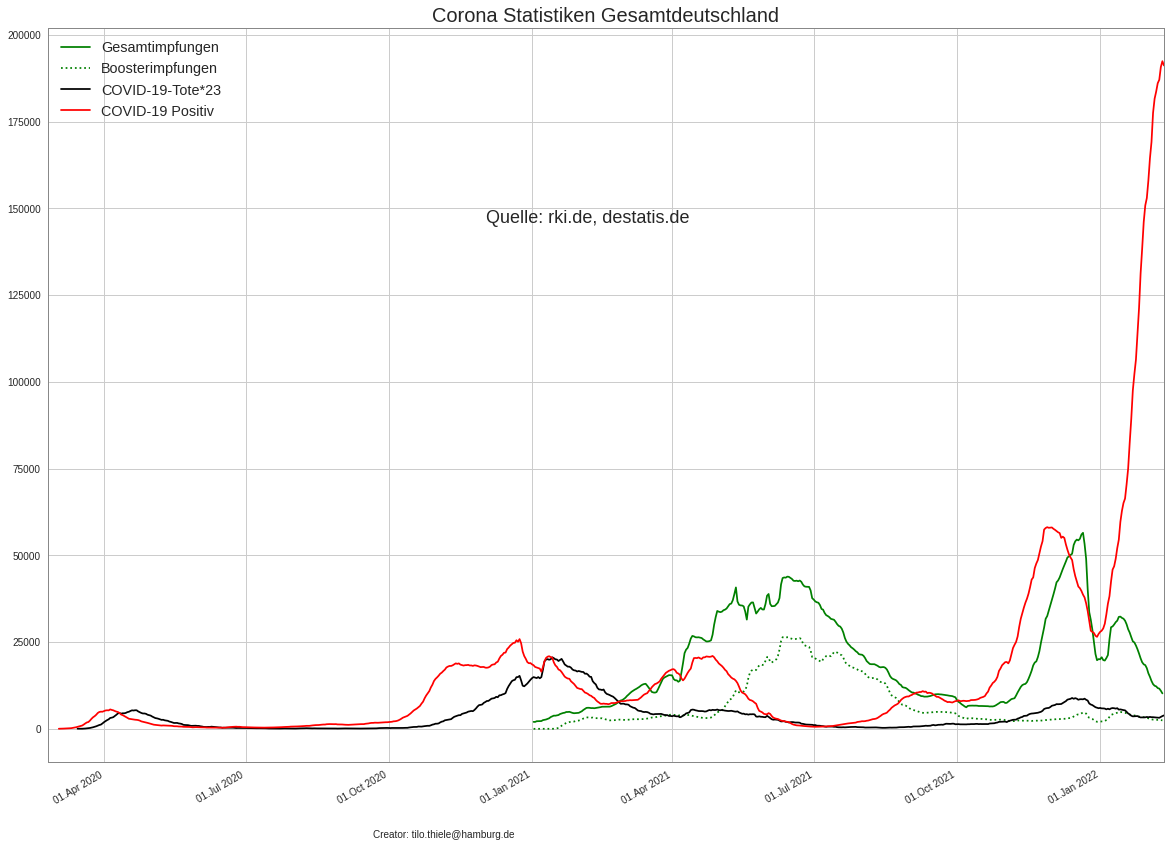

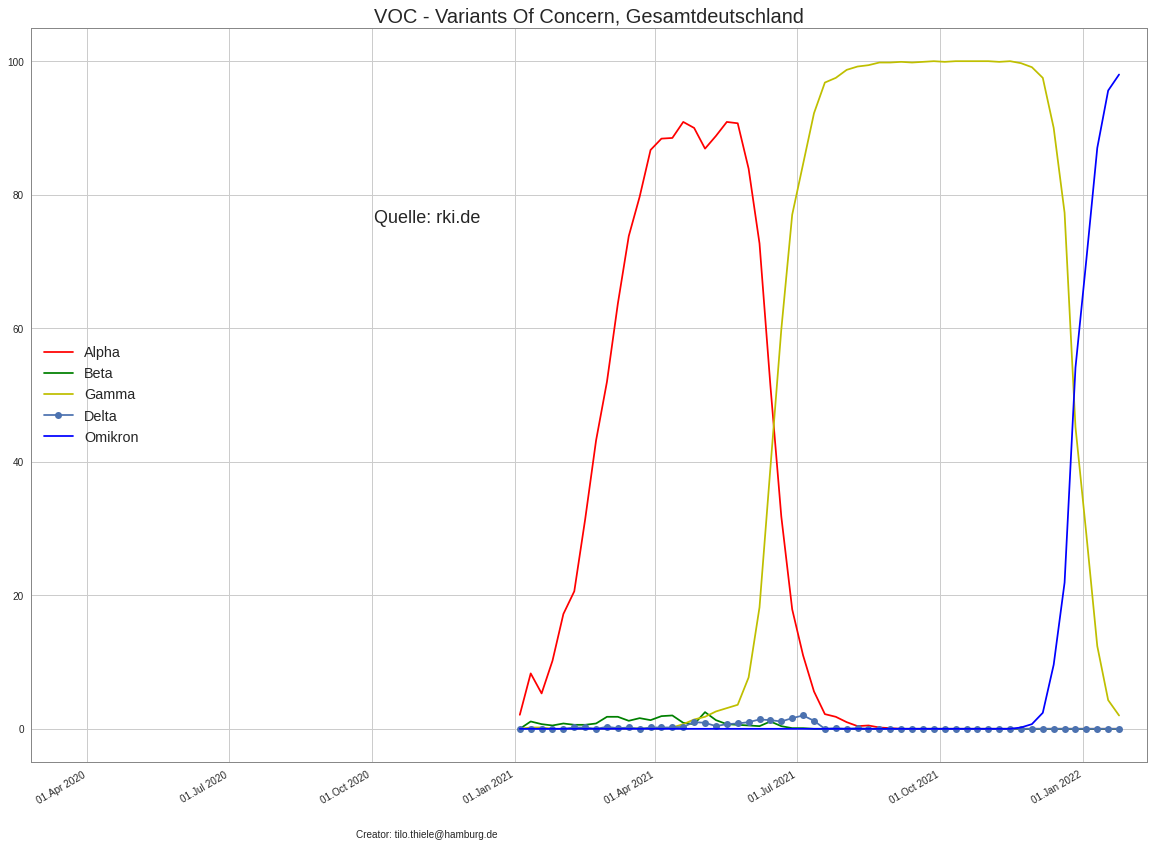

In [3]:
# Diagramme plotten
# https://www.grund-wissen.de/informatik/python/scipy/matplotlib.html

#tab_todesfaelle wird nicht verwendet, da ein (ähnlicher?) Datensatz bereits in tab_fallzahlen_gesamt enthalten ist
#jahr = tab_todesfaelle['Sterbejahr']
#woche = tab_todesfaelle['Sterbewoche']
#tote = tab_todesfaelle["Anzahl verstorbene COVID-19 Fälle"]

#datum_tote = jahr.copy()
#for i in range(len(jahr)):
#    datum_tote[i] = date_by_kw(jahr[i], woche[i])
    
datum_fallzahlen = tab_fallzahlen_gesamt['Berichtsdatum']
covid_fallzahlen = tab_fallzahlen_gesamt['Differenz Vortag Fälle']
tote_fallzahlen = tab_fallzahlen_gesamt['Differenz Vortag Todesfälle']

datum_voc = tab_voc['KW']
alphap_voc = tab_voc['Alpha%']

datum_impfungen = tab_impfquoten['Datum']
erstimpfungen = tab_impfquoten['Erstimpfung']
zweitimpfungen = tab_impfquoten['Zweitimpfung']
boosterimpfungen = tab_impfquoten['Auffrischimpfung']
gesamtimpfungen =  tab_impfquoten['Gesamtzahl verabreichter Impfstoffdosen']

min_date = min(min(datum_fallzahlen), min(datum_impfungen), min(datum_voc))
max_date = max(max(datum_fallzahlen), max(datum_impfungen), max(datum_voc))

plt.style.use('seaborn')
plt.rcParams["axes.edgecolor"] = "#888888"
plt.rcParams["axes.linewidth"] = 1
f, main_ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)
#plt.plot_date(datum_tote, tote, 'b-', label='COVID-19-Tote (1)')
plt.plot_date(datum_impfungen, gesamtimpfungen.rolling(7).mean()/20, 'g-', label='Gesamtimpfungen')
plt.plot_date(datum_impfungen, zweitimpfungen.rolling(7).mean()/20, 'g:', label='Boosterimpfungen')
plt.plot_date(datum_fallzahlen, tote_fallzahlen.rolling(7).mean()*23, '-', color='black', label='COVID-19-Tote*23')
plt.plot_date(datum_fallzahlen, covid_fallzahlen.rolling(7).mean(), 'r-', label='COVID-19 Positiv')
plt.legend(loc='upper left', fontsize='x-large')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d.%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
main_ax.set_xlim(min_date, max_date)
main_ax.set_facecolor('xkcd:white')
main_ax.grid(True, color='#cccccc')
plt.title('Corona Statistiken Gesamtdeutschland', fontsize=20)
plt.figtext(0.5, 0.7, "Quelle: rki.de, destatis.de", ha="center", fontsize=18)
plt.figtext(0.4, 0.13, "Creator: tilo.thiele@hamburg.de", ha="center")
plt.show()

#f = plt.figure()
f, main_ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)
plt.plot_date(datum_voc, tab_voc['Alpha%'], 'r-', label='Alpha')
plt.plot_date(datum_voc, tab_voc['Beta%'], 'g-', label='Beta')
plt.plot_date(datum_voc, tab_voc['Gamma%'], 'y-', label='Gamma')
plt.plot_date(datum_voc, tab_voc['Delta%'], 'o-', label='Delta')
plt.plot_date(datum_voc, tab_voc['Omikron%'], 'b-', label='Omikron')
plt.legend(loc='center left', fontsize='x-large')
#plt.legend(loc='upper left', fontsize='x-large', )
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d.%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
main_ax.set_xlim(min_date, max_date)
main_ax.set_facecolor('xkcd:white')
main_ax.grid(True, color='#cccccc')
plt.title('VOC - Variants Of Concern, Gesamtdeutschland', fontsize=20)
plt.figtext(0.4, 0.7, "Quelle: rki.de", ha="center", fontsize=18)
plt.figtext(0.4, 0.13, "Creator: tilo.thiele@hamburg.de", ha="center")
plt.show()

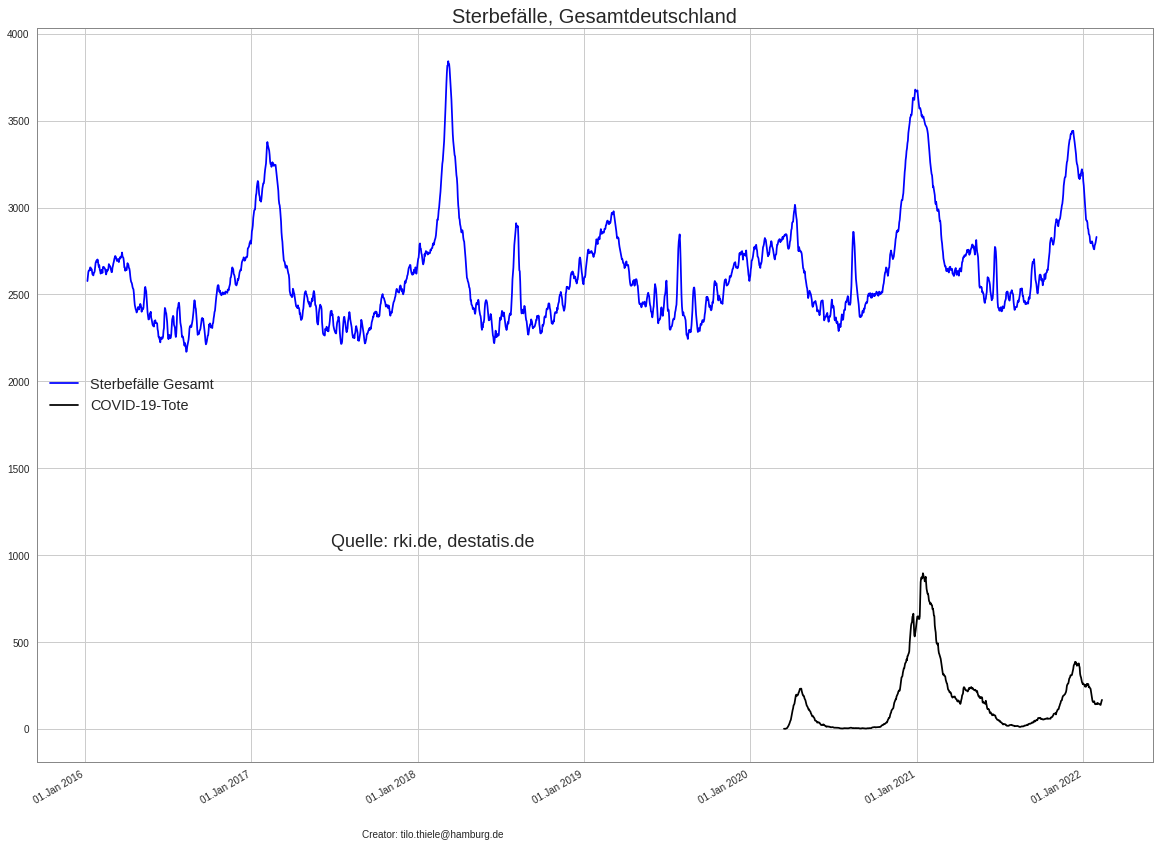

In [4]:
sterbefaelle = tab_sterbefaelle_transposed['Sterbefaelle']
datum_sterbefaelle = tab_sterbefaelle_transposed.index

f, main_ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(20)
plt.plot_date(datum_sterbefaelle, sterbefaelle.rolling(7).mean(), 'b-', label='Sterbefälle Gesamt')
plt.plot_date(datum_fallzahlen, tote_fallzahlen.rolling(7).mean(), '-', color='black', label='COVID-19-Tote')
plt.legend(loc='center left', fontsize='x-large')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d.%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
main_ax.set_facecolor('xkcd:white')
main_ax.grid(True, color='#cccccc')
plt.title('Sterbefälle, Gesamtdeutschland', fontsize=20)
plt.figtext(0.4, 0.4, "Quelle: rki.de, destatis.de", ha="center", fontsize=18)
plt.figtext(0.4, 0.13, "Creator: tilo.thiele@hamburg.de", ha="center")
plt.show()